In [104]:
import pandas as pd
import math
import numpy as np

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv(r"E:\Academics\Projects\Marketing Project\Data\Students.csv")

In [5]:
df.head(2)

,JEEPRE,JEEMAINS,STATUS
0,34.623660,78.024693,0
1,30.286711,43.894998,0


In [6]:
df.shape

(100, 3)

In [110]:
x = df.iloc[:,:2]

In [111]:
x.shape

(100, 2)

In [112]:
y = df.iloc[:,-1]

In [113]:
y.shape

(100,)

In [114]:
knn = KNeighborsClassifier(n_neighbors=3)

In [115]:
model = knn.fit(x,y)

In [116]:
pred = model.predict(x)

In [117]:
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
from sklearn.metrics import accuracy_score

In [120]:
confusion_matrix(y, pred)

array([[39,  1],
       [ 4, 56]], dtype=int64)

In [121]:
accuracy_score(y, pred)

0.95

In [122]:
error_rate = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x,y)
    pred_i = knn.predict(x) 
    error_rate.append(np.mean(pred_i != y))
    

In [123]:
error_rate

[0.0,
 0.06,
 0.05,
 0.06,
 0.08,
 0.09,
 0.06,
 0.09,
 0.06,
 0.09,
 0.07,
 0.08,
 0.07,
 0.08,
 0.08,
 0.09,
 0.07,
 0.08,
 0.05,
 0.08]

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
ds = DecisionTreeClassifier(criterion="gini")

In [127]:
rf = RandomForestClassifier(criterion="gini")

In [128]:
model1 = ds.fit(x,y)

In [129]:
model2 = rf.fit(x,y)

In [130]:
pred1 = model1.predict(x)

In [131]:
pred2 = model2.predict(x)

In [132]:
pred1

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [133]:
pred2

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [134]:
confusion_matrix(y, pred1)

array([[40,  0],
       [ 0, 60]], dtype=int64)

In [135]:
confusion_matrix(y, pred2)

array([[40,  0],
       [ 0, 60]], dtype=int64)

In [137]:
feat_imp1 = pd.Series(model1.feature_importances_, index=x.columns)

In [138]:
feat_imp1

JEEPRE      0.596348
JEEMAINS    0.403652
dtype: float64

<Axes: >

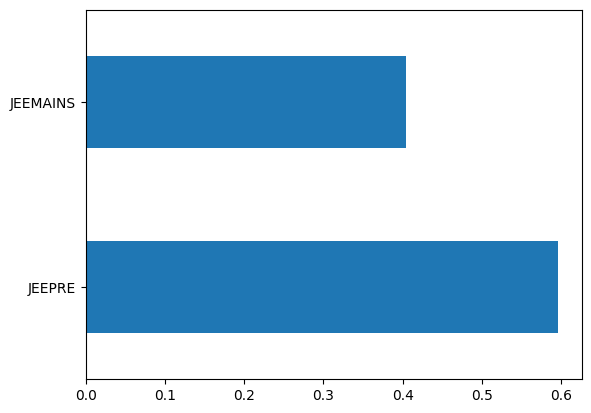

In [139]:
feat_imp1.nlargest(2).plot(kind= "barh")

In [140]:
feat_imp2 = pd.Series(model2.feature_importances_, index=x.columns)

<Axes: >

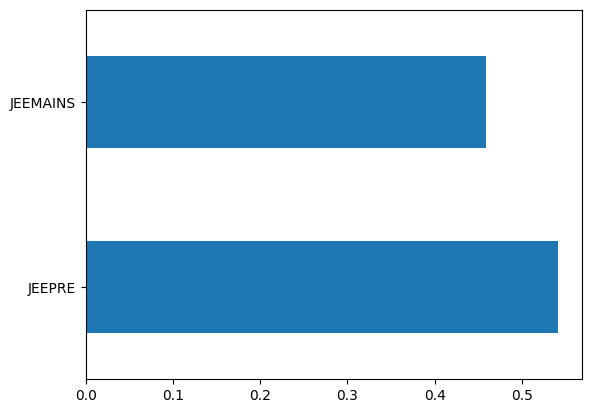

In [141]:
feat_imp2.nlargest(2).plot(kind='barh')

In [142]:
feat_imp2

JEEPRE      0.541655
JEEMAINS    0.458345
dtype: float64

In [143]:
import seaborn as sns

In [144]:
df1 = sns.load_dataset("iris")

In [145]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [151]:
x1 = df1.iloc[:,:4]

In [152]:
x1

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [154]:
y1 = df1.iloc[:,-1]

In [155]:
y1

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [156]:
knn1 = KNeighborsClassifier()

In [157]:
model3 = knn1.fit(x1, y1)

In [159]:
pred3 = model3.predict(x1)

In [161]:
accuracy_score(y1 ,pred3)

0.9666666666666667

In [176]:
dt2 = DecisionTreeClassifier(criterion="gini")

In [177]:
model4 = dt2.fit(x1,y1)

In [ ]:
pred4 = model4.predict(x1)

In [190]:
accuracy_score(y1, pred4)

1.0

In [182]:
rf2 = RandomForestClassifier(criterion="gini")

In [183]:
model5 = rf2.fit(x1, y1)

In [184]:
pred5 = model5.predict(x1)

In [185]:
feat_imp3 = pd.Series(model4.feature_importances_, index=x1.columns)

<Axes: >

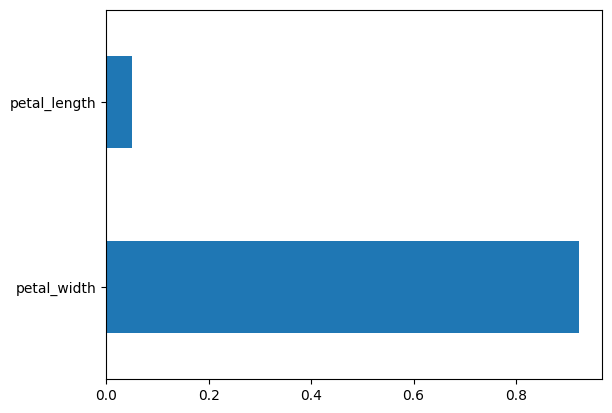

In [192]:
feat_imp3.nlargest(2).plot(kind="barh")

In [187]:
feat_imp4 = pd.Series(model5.feature_importances_, index=x1.columns)

<Axes: >

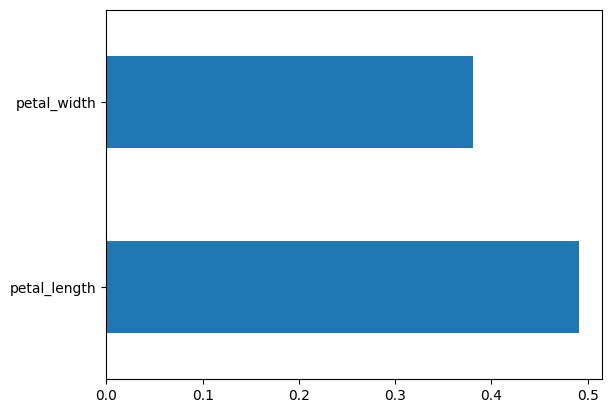

In [188]:
feat_imp4.nlargest(2).plot(kind="barh")